# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 623


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Print the cities
print(cities)

['severnoye', 'badger', 'port-aux-francais', 'polyarnyy', 'constantia', 'puerto natales', 'shingu', 'ilulissat', 'nueva helvecia', 'puerto ayora', 'rongelap', 'waitangi', 'papatowai', 'anadyr', 'margaret river', 'port alfred', 'edinburgh of the seven seas', 'awjilah', 'muroto-misakicho', 'road town', 'isafjordur', 'petropavlovsk-kamchatsky', 'whitehorse', 'saint-joseph', "medyn'", 'roudnice nad labem', 'bilibino', 'minas de marcona', 'grytviken', 'keuruu', 'tosontsengel', 'kristiansund', 'talara', 'adamstown', 'glace bay', 'hawaiian paradise park', 'tarauaca', 'tual', 'invercargill', 'yellowknife', 'al mindak', 'takamaka', 'nuuk', 'georgetown', 'ginir', 'plymouth', 'keyser', 'remire-montjoly', 'nova sintra', 'cidreira', 'hamilton', 'tiksi', 'jamestown', 'novodvinsk', 'twon-brass', 'chamical', 'les anglais', 'aripuana', 'margate', 'namibe', 'howrah', 'avarua', 'jiaozuo', 'itoman', 'port lincoln', 'flying fish cove', 'dalandzadgad', 'bethel', 'whyalla stuart', 'booue', 'la maddalena', 't

In [4]:
print (weather_api_key)

6628469b19b5ab5221389d7e69d8caac


In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID="+ weather_api_key
api_format = "json"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = requests.get(f"{url}cities?format={api_format}").json()
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(f"{url}&q={city}").json()
       # print (city_weather)
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp=city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds =  city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country=city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(e)
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | severnoye
Processing Record 2 of Set 1 | badger
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | polyarnyy
Processing Record 5 of Set 1 | constantia
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | shingu
Processing Record 8 of Set 1 | ilulissat
Processing Record 9 of Set 1 | nueva helvecia
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | rongelap
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | papatowai
Processing Record 14 of Set 1 | anadyr
Processing Record 15 of Set 1 | margaret river
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | edinburgh of the seven seas
Processing Record 18 of Set 1 | awjilah
Processing Record 19 of Set 1 | muroto-misakicho
Processing Record 20 of Set 1 | road town
Processing Record 21 of Set 1 | isafjordur
Processing Record 22 of S

Processing Record 44 of Set 4 | vadso
Processing Record 45 of Set 4 | clarence town
Processing Record 46 of Set 4 | north bend
Processing Record 47 of Set 4 | cravinhos
Processing Record 48 of Set 4 | ust-nera
Processing Record 49 of Set 4 | punta arenas
Processing Record 0 of Set 5 | balkanabat
Processing Record 1 of Set 5 | bodaybo
Processing Record 2 of Set 5 | beloyarskiy
Processing Record 3 of Set 5 | bodo
Processing Record 4 of Set 5 | kutum
Processing Record 5 of Set 5 | kolonia town
Processing Record 6 of Set 5 | fonadhoo
'coord'
Processing Record 7 of Set 5 | gaiman
Processing Record 8 of Set 5 | birobidzhan
Processing Record 9 of Set 5 | usinsk
Processing Record 10 of Set 5 | salinopolis
Processing Record 11 of Set 5 | veinticinco de mayo
Processing Record 12 of Set 5 | puerto deseado
Processing Record 13 of Set 5 | ahau
'coord'
Processing Record 14 of Set 5 | linxia chengguanzhen
Processing Record 15 of Set 5 | kulhudhuffushi
Processing Record 16 of Set 5 | boguchar
Processi

Processing Record 38 of Set 8 | upata
Processing Record 39 of Set 8 | fortuna
Processing Record 40 of Set 8 | fort bragg
Processing Record 41 of Set 8 | guerrero negro
Processing Record 42 of Set 8 | tamuin
Processing Record 43 of Set 8 | beterou
Processing Record 44 of Set 8 | keflavik
Processing Record 45 of Set 8 | joshimath
Processing Record 46 of Set 8 | anapa
Processing Record 47 of Set 8 | lospalos
Processing Record 48 of Set 8 | mahilyow
Processing Record 49 of Set 8 | badiyah
Processing Record 0 of Set 9 | labytnangi
Processing Record 1 of Set 9 | llorente
Processing Record 2 of Set 9 | sinabang
Processing Record 3 of Set 9 | itanhem
Processing Record 4 of Set 9 | prado
Processing Record 5 of Set 9 | mount pearl
Processing Record 6 of Set 9 | sur
Processing Record 7 of Set 9 | woolgoolga
Processing Record 8 of Set 9 | puerto armuelles
Processing Record 9 of Set 9 | berezovyy
Processing Record 10 of Set 9 | soto la marina
Processing Record 11 of Set 9 | quepos
Processing Record

Processing Record 30 of Set 12 | la libertad
Processing Record 31 of Set 12 | happy valley-goose bay
Processing Record 32 of Set 12 | morehead city
Processing Record 33 of Set 12 | ancud
Processing Record 34 of Set 12 | sierra grande
Processing Record 35 of Set 12 | nantucket
Processing Record 36 of Set 12 | nemuro
Processing Record 37 of Set 12 | vorgashor
Processing Record 38 of Set 12 | sept-iles
Processing Record 39 of Set 12 | kill devil hills
Processing Record 40 of Set 12 | tsiombe
Processing Record 41 of Set 12 | santo antonio
Processing Record 42 of Set 12 | treinta y tres
Processing Record 43 of Set 12 | ulladulla
Processing Record 44 of Set 12 | oriximina
Processing Record 45 of Set 12 | garden city
Processing Record 46 of Set 12 | zeya
Processing Record 47 of Set 12 | naze
Processing Record 48 of Set 12 | milledgeville
Processing Record 49 of Set 12 | onega
Processing Record 0 of Set 13 | felege neway
Processing Record 1 of Set 13 | gamay
Processing Record 2 of Set 13 | swa

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          597
Lat           597
Lng           597
Max Temp      597
Humidity      597
Cloudiness    597
Wind Speed    597
Country       597
Date          597
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,severnoye,56.3491,78.3619,23.92,51,39,5.11,RU,1690268895
1,badger,64.8000,-147.5333,23.95,68,75,0.00,US,1690268895
2,port-aux-francais,-49.3500,70.2167,3.07,65,100,6.55,TF,1690268896
3,polyarnyy,69.1989,33.4478,10.36,94,100,3.17,RU,1690268896
4,constantia,44.1833,28.6500,29.38,53,10,7.18,RO,1690268645


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,severnoye,56.3491,78.3619,23.92,51,39,5.11,RU,1690268895
1,badger,64.8000,-147.5333,23.95,68,75,0.00,US,1690268895
2,port-aux-francais,-49.3500,70.2167,3.07,65,100,6.55,TF,1690268896
3,polyarnyy,69.1989,33.4478,10.36,94,100,3.17,RU,1690268896
4,constantia,44.1833,28.6500,29.38,53,10,7.18,RO,1690268645


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

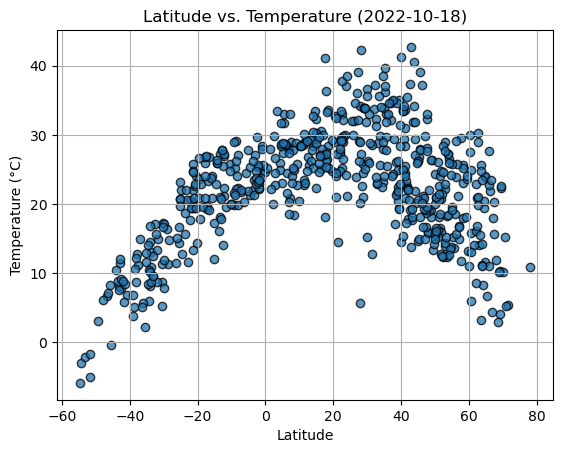

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Temperature (°C)")
plt.title("Latitude vs. Temperature (2022-10-18)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

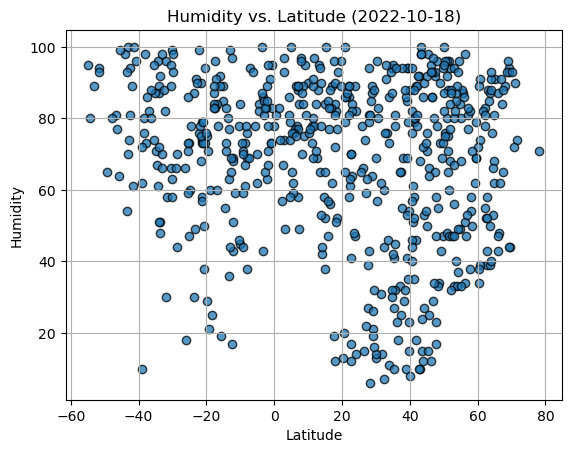

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs. Latitude (2022-10-18)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

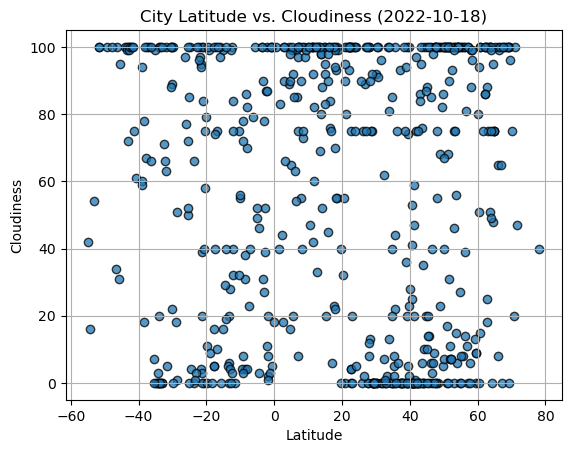

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

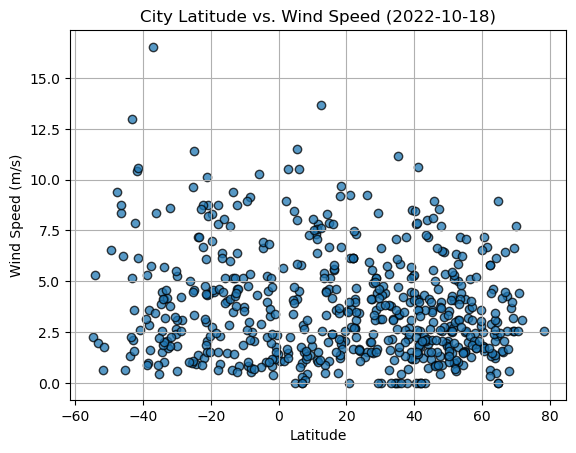

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots

def func_regress(x, y, x_label, y_label,x_plot, y_plot):
    
    # Run linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot scatter plot
    plt.scatter(x,y)

    # Plot regression line
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(x_plot, y_plot),fontsize=15,color="red")
  
    
    # Label plot
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Print r square value
    print(f"R squared: {r_value**2}")

    # Show plot
    plt.show()




In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

# Separate the data into Northern and Southern Hemispheres
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,severnoye,56.3491,78.3619,23.92,51,39,5.11,RU,1690268895
1,badger,64.8000,-147.5333,23.95,68,75,0.00,US,1690268895
3,polyarnyy,69.1989,33.4478,10.36,94,100,3.17,RU,1690268896
4,constantia,44.1833,28.6500,29.38,53,10,7.18,RO,1690268645
6,shingu,33.7333,135.9833,29.82,73,13,3.16,JP,1690268897


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port-aux-francais,-49.3500,70.2167,3.07,65,100,6.55,TF,1690268896
5,puerto natales,-51.7236,-72.4875,-5.09,94,100,0.63,CL,1690268897
8,nueva helvecia,-34.3000,-57.2333,5.92,96,3,4.45,UY,1690268898
9,puerto ayora,-0.7393,-90.3518,24.75,95,100,1.79,EC,1690268899
11,waitangi,-43.9535,-176.5597,10.46,98,100,1.34,NZ,1690268899


###  Temperature vs. Latitude Linear Regression Plot

R squared: 0.24220224577875454


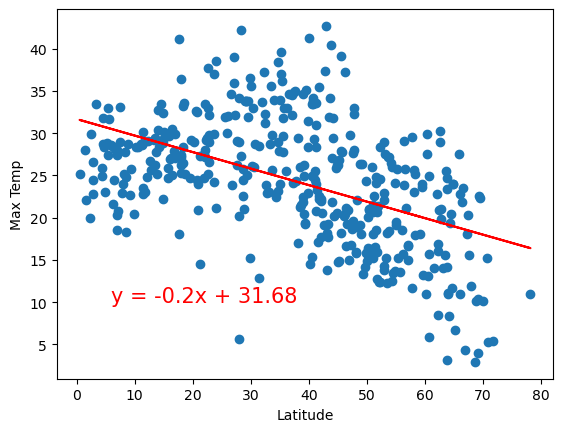

In [18]:
# Linear regression on Northern Hemisphere
func_regress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Max Temp',6,10)

R squared: 0.751498969609481


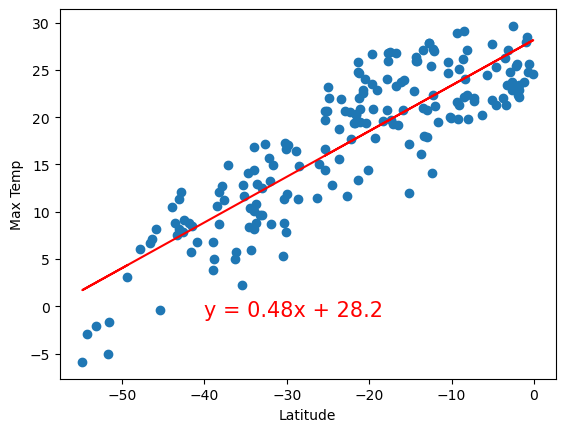

In [19]:
# Linear regression on Southern Hemisphere
func_regress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Max Temp',-40,-1)

**Discussion about the linear relationship:** In the northern hemisphere data, the slope is negative and the correlation is 0.31. This shows latitude and  max_temperature have a weak correlation. In the southern hemisphere, the slope is positive and correlation using R-squared value is 0.65. There is stronger correlation between latitude and max-temperaturein southern hemisphere than in northern hemisphere.Although the correlation is not strong enough as it is not very close to 1.

### Humidity vs. Latitude Linear Regression Plot

R squared: 0.0025091196010109556


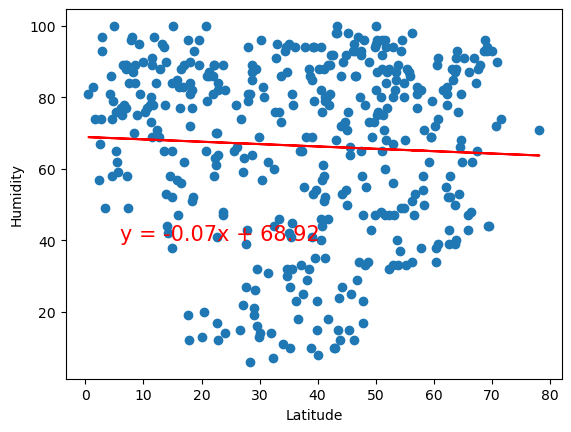

In [20]:
# Northern Hemisphere
func_regress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity',6,40)

R squared: 0.014519535197095514


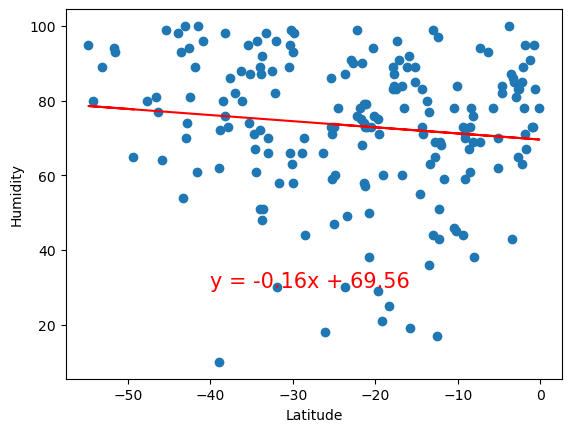

In [21]:
# Southern Hemisphere
func_regress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity', -40,30)

**Discussion about the linear relationship:** Humidity and latitude have weak/no correlations in both northern and southern hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

R squared: 0.010859044631366638


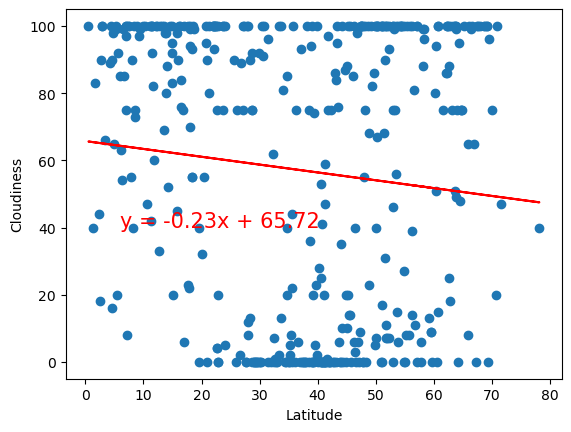

In [24]:
# Northern Hemisphere
func_regress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness',6,40)

R squared: 0.03834148624439268


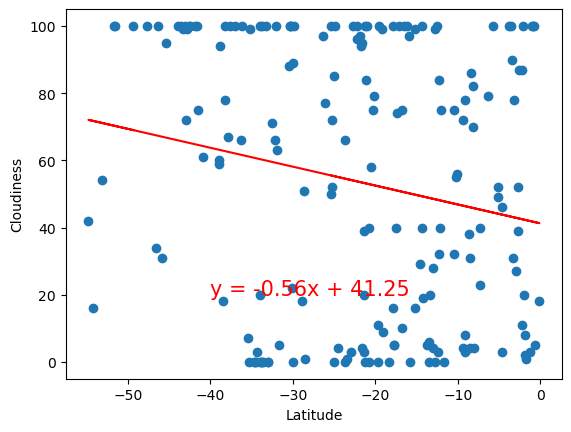

In [25]:
# Southern Hemisphere
func_regress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness',-40,20)

**Discussion about the linear relationship:** In southern and northern hemisphere, cloudiness has no correlation with latitude and there exist a negative slope in the datas.

### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.018146663470688173


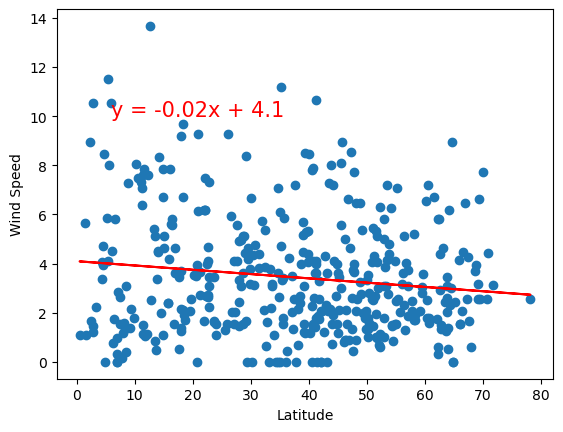

In [28]:
# Northern Hemisphere
func_regress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed',6,10)

R squared: 0.012625903625050488


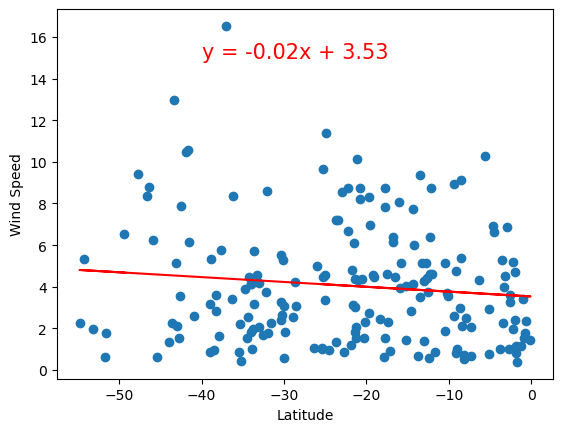

In [29]:
# Southern Hemisphere
func_regress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed',-40,15)

**Discussion about the linear relationship:** In southern and northern hemisphere, cloudiness has no correlation with latitude and there exist a negative slope in both hemispheres.